In [2]:
import os
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm

dataset_path = r"C:\Users\lenovo\Downloads\archive (4)\data" 
# Define train and test directories
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")
categories = ["benign", "malignant"]
# Function to load images
def load_images_from_directory(directory):
    image_data = []
    labels = []
    img_size = (64, 64)  

    for category in categories:
        category_path = os.path.join(directory, category)  
        
        if not os.path.exists(category_path):
            raise FileNotFoundError(f"Category folder not found: {category_path}")

        label = 0 if category == "benign" else 1 

        for img_name in tqdm(os.listdir(category_path), desc=f"Loading {category} images from {directory}"):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, img_size)  
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
                image_data.append(img)
                labels.append(label)

    return np.array(image_data, dtype=np.float32) / 255.0, np.array(labels)  
# Load train and test datasets
X_train, y_train = load_images_from_directory(train_dir)
X_test, y_test = load_images_from_directory(test_dir)
# Convert to DataFrames
train_df = pd.DataFrame({"image": list(X_train), "label": y_train})
test_df = pd.DataFrame({"image": list(X_test), "label": y_test})
print(f"Train set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")


Loading benign images from C:\Users\lenovo\Downloads\archive (4)\data\train: 100%|██████████| 1440/1440 [00:21<00:00, 65.96it/s]
Loading malignant images from C:\Users\lenovo\Downloads\archive (4)\data\train: 100%|██████████| 1197/1197 [00:17<00:00, 67.22it/s]
Loading benign images from C:\Users\lenovo\Downloads\archive (4)\data\test: 100%|██████████| 360/360 [00:05<00:00, 67.90it/s]
Loading malignant images from C:\Users\lenovo\Downloads\archive (4)\data\test: 100%|██████████| 300/300 [00:04<00:00, 66.19it/s]

Train set size: (2637, 2)
Test set size: (660, 2)


In [72]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train_flat = np.array([img.flatten() for img in train_df["image"]])
X_test_flat = np.array([img.flatten() for img in test_df["image"]])

y_train = train_df["label"].values
y_test = test_df["label"].values

# Train SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_flat, y_train)

# Predict on train and test sets
y_train_pred = svm_model.predict(X_train_flat)
y_test_pred = svm_model.predict(X_test_flat)

print("Train Set Evaluation:")
print(classification_report(y_train, y_train_pred, target_names=["Benign", "Malignant"]))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred, target_names=["Benign", "Malignant"]))

#Print accuracy, precision, recall, f1-score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train Set Evaluation:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1440
   Malignant       1.00      1.00      1.00      1197

    accuracy                           1.00      2637
   macro avg       1.00      1.00      1.00      2637
weighted avg       1.00      1.00      1.00      2637

Test Set Evaluation:
              precision    recall  f1-score   support

      Benign       0.76      0.79      0.77       360
   Malignant       0.74      0.70      0.72       300

    accuracy                           0.75       660
   macro avg       0.75      0.74      0.75       660
weighted avg       0.75      0.75      0.75       660

Train Accuracy: 99.96%
Test Accuracy: 74.85%


In [73]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Convert images from 3D (64, 64, 3) 1D (flatten)
X_train_flat = np.array([img.flatten() for img in train_df["image"]])
X_test_flat = np.array([img.flatten() for img in test_df["image"]])

y_train = train_df["label"].values
y_test = test_df["label"].values

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Predict on train and test sets
y_train_pred = rf_model.predict(X_train_flat)
y_test_pred = rf_model.predict(X_test_flat)

print("Train Set Evaluation:")
print(classification_report(y_train, y_train_pred, target_names=["Benign", "Malignant"]))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred, target_names=["Benign", "Malignant"]))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Random Forest Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Random Forest Test Accuracy: {test_accuracy * 100:.2f}%")

Train Set Evaluation:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1440
   Malignant       1.00      1.00      1.00      1197

    accuracy                           1.00      2637
   macro avg       1.00      1.00      1.00      2637
weighted avg       1.00      1.00      1.00      2637

Test Set Evaluation:
              precision    recall  f1-score   support

      Benign       0.86      0.80      0.83       360
   Malignant       0.78      0.84      0.81       300

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660

Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 81.82%


In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report

# Convert images & labels to NumPy arrays
X_train = np.array([np.array(img, dtype=np.float32) for img in train_df["image"]]) / 255.0
X_test = np.array([np.array(img, dtype=np.float32) for img in test_df["image"]]) / 255.0
y_train = np.array(train_df["label"])
y_test = np.array(test_df["label"])

# Define CNN Model
model = keras.Sequential([
    keras.Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Predict on train and test sets
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"CNN Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"CNN Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification reports
print("Train Set Evaluation:")
print(classification_report(y_train, y_train_pred, target_names=["Benign", "Malignant"]))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred, target_names=["Benign", "Malignant"]))


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.5190 - loss: 0.6919 - val_accuracy: 0.5455 - val_loss: 0.6893
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5530 - loss: 0.6886 - val_accuracy: 0.5455 - val_loss: 0.6893
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.5518 - loss: 0.6889 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.5579 - loss: 0.6880 - val_accuracy: 0.5455 - val_loss: 0.6893
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.5458 - loss: 0.6904 - val_accuracy: 0.5455 - val_loss: 0.6892
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.5433 - loss: 0.6908 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.5560 - loss: 0.6868 - val_accuracy: 0.5455 - val_loss: 0.6899
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.5345 - loss: 0.6915 - val_accuracy: 0.5455

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\anaconda3\Lib\site-pa

In [3]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from tensorflow.keras.applications import EfficientNetB3, ResNet50
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.models import Model
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Paths
dataset_path = r"C:\Users\lenovo\Downloads\archive (4)\data"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")
categories = ["benign", "malignant"]

# Image loader
def load_images(directory, preprocess_func):
    images, labels = [], []
    for category in categories:
        label = 0 if category == "benign" else 1
        folder = os.path.join(directory, category)
        for img_name in tqdm(os.listdir(folder), desc=f"Loading {category}"):
            path = os.path.join(folder, img_name)
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = preprocess_func(img.astype(np.float32))
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load images
X_train_e, y_train = load_images(train_dir, efficientnet_preprocess)
X_test_e, y_test = load_images(test_dir, efficientnet_preprocess)
X_train_r, _ = load_images(train_dir, resnet_preprocess)
X_test_r, _ = load_images(test_dir, resnet_preprocess)

# Print initial image shape
print(f"\nOriginal image shape (after preprocessing): {X_train_e.shape[1:]}") 

# Extract features
effnet = EfficientNetB3(weights="imagenet", include_top=False, pooling='avg', input_shape=(224, 224, 3))
resnet = ResNet50(weights="imagenet", include_top=False, pooling='avg', input_shape=(224, 224, 3))
model1 = Model(inputs=effnet.input, outputs=effnet.output)
model2 = Model(inputs=resnet.input, outputs=resnet.output)

features_effnet_train = model1.predict(X_train_e, verbose=1)
features_effnet_test = model1.predict(X_test_e, verbose=1)
features_resnet_train = model2.predict(X_train_r, verbose=1)
features_resnet_test = model2.predict(X_test_r, verbose=1)

# Print feature shapes after individual model extraction
print(f"\nFeatures from EfficientNetB3: {features_effnet_train.shape[1]}")  
print(f"Features from ResNet50: {features_resnet_train.shape[1]}")        

# Combine features
combined_train = np.concatenate([features_effnet_train, features_resnet_train], axis=1)
combined_test = np.concatenate([features_effnet_test, features_resnet_test], axis=1)

# Print combined feature size
print(f"\nCombined feature size: {combined_train.shape[1]}")  # e.g., 3584

# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=300)
X_train_selected = selector.fit_transform(combined_train, y_train)
X_test_selected = selector.transform(combined_test)

# Print final feature size after selection
print(f"\nSelected top K features: {X_train_selected.shape[1]}")  # 300

# Save files
np.save(os.path.join(dataset_path, "X_train_combined.npy"), X_train_selected)
np.save(os.path.join(dataset_path, "X_test_combined.npy"), X_test_selected)
np.save(os.path.join(dataset_path, "y_train.npy"), y_train)
np.save(os.path.join(dataset_path, "y_test.npy"), y_test)

print("\nFeature extraction and selection completed and saved!")


Loading malignant: 100%|██████████| 300/300 [00:00<00:00, 601.22it/s]



Original image shape (after preprocessing): (224, 224, 3)
83/83 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step

Features from EfficientNetB3: 1536
Features from ResNet50: 2048

Combined feature size: 3584

Selected top K features: 300

Feature extraction and selection completed and saved!


In [4]:
import numpy as np

dataset_path = r"C:\Users\lenovo\Downloads\archive (4)\data"

X_train = np.load(os.path.join(dataset_path, "X_train_combined.npy"))
X_test = np.load(os.path.join(dataset_path, "X_test_combined.npy"))
y_train = np.load(os.path.join(dataset_path, "y_train.npy"))
y_test = np.load(os.path.join(dataset_path, "y_test.npy"))


SVM Classification Report:
              precision    recall  f1-score   support

      Benign       0.91      0.86      0.89       360
   Malignant       0.85      0.90      0.87       300

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660

SVM Accuracy: 0.8787878787878788


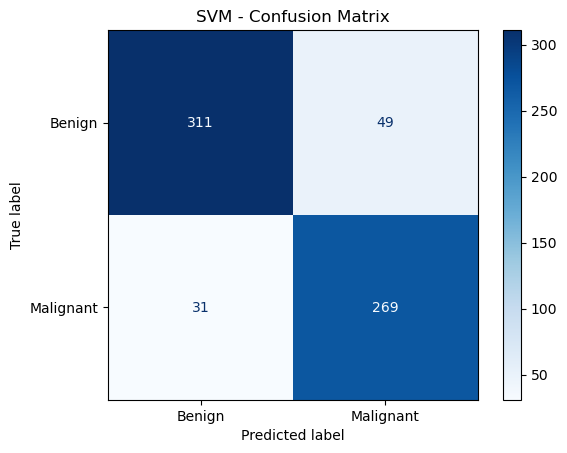

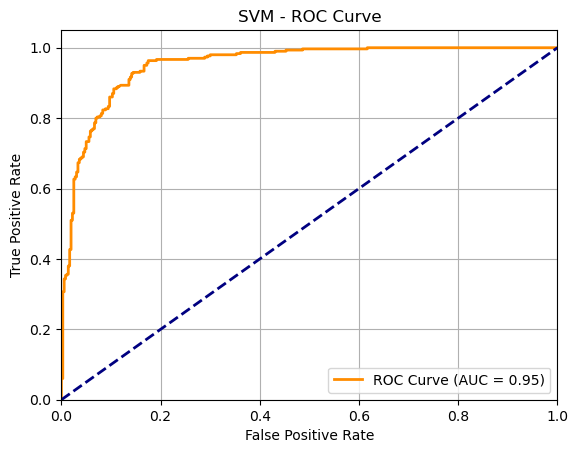

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Train SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Benign", "Malignant"]))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM - Confusion Matrix")
plt.show()

# probability scores for the positive class (Malignant)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       0.91      0.84      0.87       360
   Malignant       0.82      0.90      0.86       300

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.86       660
weighted avg       0.87      0.87      0.87       660

Random Forest Accuracy: 0.8651515151515151


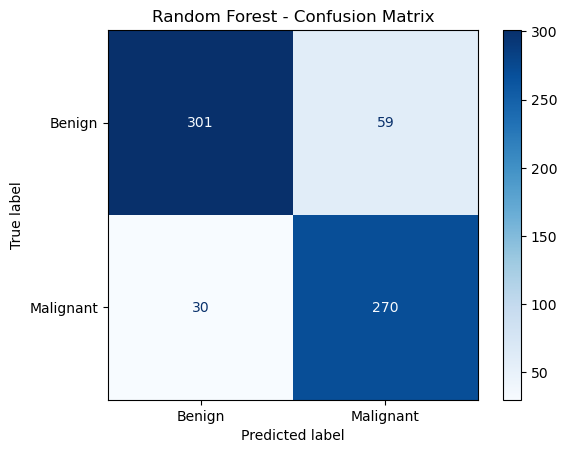

Confusion Matrix:
[[301  59]
 [ 30 270]]


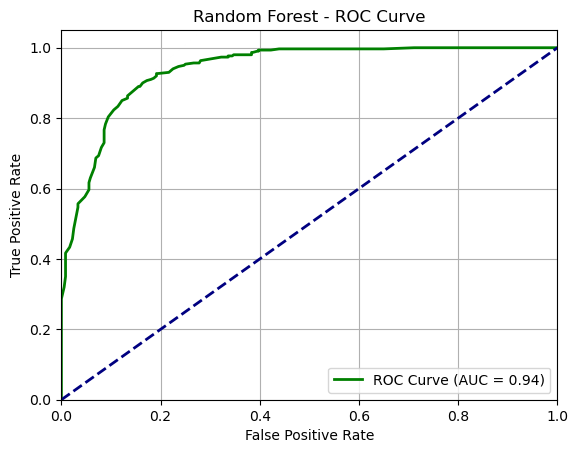

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Benign", "Malignant"]))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.show()

#Print Confusion Matrix
print("Confusion Matrix:")
print(conf_mat)

#probability scores for the positive class (Malignant)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Loading malignant: 100%|██████████| 300/300 [00:01<00:00, 227.16it/s]
C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6705 - loss: 0.6058
Epoch 1: val_accuracy improved from -inf to 0.75455, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 467s 5s/step - accuracy: 0.6714 - loss: 0.6048 - val_accuracy: 0.7545 - val_loss: 0.4663 - learning_rate: 1.0000e-04
Epoch 2/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7985 - loss: 0.4278
Epoch 2: val_accuracy improved from 0.75455 to 0.78182, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 425s 5s/step - accuracy: 0.7986 - loss: 0.4277 - val_accuracy: 0.7818 - val_loss: 0.4163 - learning_rate: 1.0000e-04
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8181 - loss: 0.4030
Epoch 3: val_accuracy improved from 0.78182 to 0.80000, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 412s 5s/step - accuracy: 0.8180 - loss: 0.4029 - val_accuracy: 0.8000 - val_loss: 0.3845 - learning_rate: 1.0000e-04
Epoch 4/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8283 - loss: 0.3893
Epoch 4: val_accuracy improved from 0.80000 to 0.81667, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 487s 6s/step - accuracy: 0.8282 - loss: 0.3893 - val_accuracy: 0.8167 - val_loss: 0.3732 - learning_rate: 1.0000e-04
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8178 - loss: 0.3659
Epoch 5: val_accuracy improved from 0.81667 to 0.82576, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 452s 5s/step - accuracy: 0.8180 - loss: 0.3659 - val_accuracy: 0.8258 - val_loss: 0.3595 - learning_rate: 1.0000e-04
Epoch 6/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8183 - loss: 0.3620
Epoch 6: val_accuracy improved from 0.82576 to 0.83030, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 406s 5s/step - accuracy: 0.8184 - loss: 0.3618 - val_accuracy: 0.8303 - val_loss: 0.3409 - learning_rate: 1.0000e-04
Epoch 7/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8380 - loss: 0.3427
Epoch 7: val_accuracy improved from 0.83030 to 0.83333, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 468s 6s/step - accuracy: 0.8381 - loss: 0.3427 - val_accuracy: 0.8333 - val_loss: 0.3339 - learning_rate: 1.0000e-04
Epoch 8/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8333 - loss: 0.3417
Epoch 8: val_accuracy did not improve from 0.83333
83/83 ━━━━━━━━━━━━━━━━━━━━ 3278s 40s/step - accuracy: 0.8333 - loss: 0.3415 - val_accuracy: 0.8333 - val_loss: 0.3380 - learning_rate: 1.0000e-04
Epoch 9/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 518s/step - accuracy: 0.8466 - loss: 0.3272  
Epoch 9: val_accuracy improved from 0.83333 to 0.84091, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 42537s 519s/step - accuracy: 0.8466 - loss: 0.3272 - val_accuracy: 0.8409 - val_loss: 0.3291 - learning_rate: 1.0000e-04
Epoch 10/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8542 - loss: 0.3158
Epoch 10: val_accuracy did not improve from 0.84091
83/83 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.8542 - loss: 0.3159 - val_accuracy: 0.8303 - val_loss: 0.3486 - learning_rate: 1.0000e-04
Epoch 11/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8499 - loss: 0.3200
Epoch 11: val_accuracy improved from 0.84091 to 0.84242, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.8499 - loss: 0.3200 - val_accuracy: 0.8424 - val_loss: 0.3275 - learning_rate: 1.0000e-04
Epoch 12/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8460 - loss: 0.3181
Epoch 12: val_accuracy did not improve from 0.84242
83/83 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.8461 - loss: 0.3180 - val_accuracy: 0.8364 - val_loss: 0.3265 - learning_rate: 1.0000e-04
Epoch 13/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8505 - loss: 0.3066
Epoch 13: val_accuracy improved from 0.84242 to 0.84697, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.8506 - loss: 0.3066 - val_accuracy: 0.8470 - val_loss: 0.3131 - learning_rate: 1.0000e-04
Epoch 14/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8368 - loss: 0.3238
Epoch 14: val_accuracy did not improve from 0.84697
83/83 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.8370 - loss: 0.3237 - val_accuracy: 0.8424 - val_loss: 0.3108 - learning_rate: 1.0000e-04
Epoch 15/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - accuracy: 0.8538 - loss: 0.3028 
Epoch 15: val_accuracy improved from 0.84697 to 0.84848, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 24692s 301s/step - accuracy: 0.8538 - loss: 0.3029 - val_accuracy: 0.8485 - val_loss: 0.3031 - learning_rate: 1.0000e-04
Epoch 16/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8658 - loss: 0.2939
Epoch 16: val_accuracy did not improve from 0.84848
83/83 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.8657 - loss: 0.2939 - val_accuracy: 0.8485 - val_loss: 0.3131 - learning_rate: 1.0000e-04
Epoch 17/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8598 - loss: 0.3137
Epoch 17: val_accuracy did not improve from 0.84848
83/83 ━━━━━━━━━━━━━━━━━━━━ 338s 4s/step - accuracy: 0.8599 - loss: 0.3135 - val_accuracy: 0.8485 - val_loss: 0.2966 - learning_rate: 1.0000e-04
Epoch 18/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8598 - loss: 0.2894
Epoch 18: val_accuracy improved from 0.84848 to 0.85455, saving model to best_model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 2401s 29s/step - accuracy: 0.8598 - loss: 0.2895 - val_accuracy: 0.8545 - val_loss: 0.3003 - learning_rate: 1.0000e-04
Epoch 19/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8481 - loss: 0.3020
Epoch 19: val_accuracy did not improve from 0.85455
83/83 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.8482 - loss: 0.3020 - val_accuracy: 0.8545 - val_loss: 0.2934 - learning_rate: 1.0000e-04
Epoch 20/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8737 - loss: 0.2948
Epoch 20: val_accuracy did not improve from 0.85455
83/83 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.8737 - loss: 0.2949 - val_accuracy: 0.8470 - val_loss: 0.2963 - learning_rate: 1.0000e-04
Epoch 21/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8664 - loss: 0.2855
Epoch 21: val_accuracy did not improve from 0.85455
83/83 ━━━━━━━━━━━━━━━━━━━━ 304s 4s/step - accuracy: 0.8664 - loss: 0.2855 - val_accuracy: 0.8394 - val_loss: 0.2921 - learning_rate: 1.0000e-04
Epoch 22/25
83

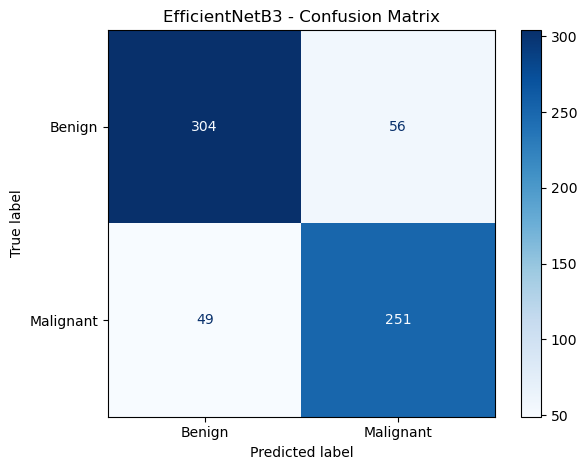

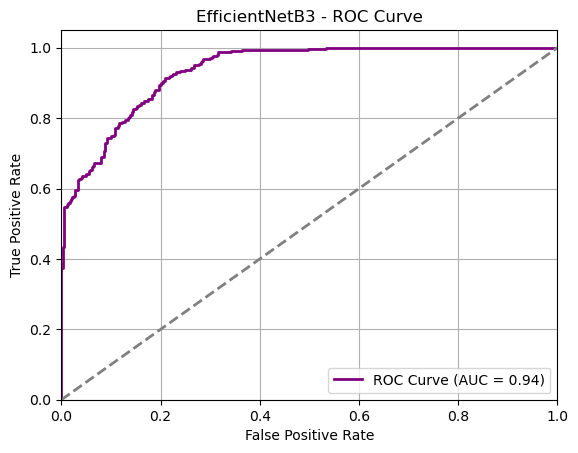

In [6]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

dataset_path = r"C:\Users\lenovo\Downloads\archive (4)\data"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")
categories = ["benign", "malignant"]

def load_images(directory, preprocess_func, img_size=(300, 300)):
    images, labels = [], []
    for category in categories:
        label = 0 if category == "benign" else 1
        folder = os.path.join(directory, category)
        for img_name in tqdm(os.listdir(folder), desc=f"Loading {category}"):
            path = os.path.join(folder, img_name)
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = preprocess_func(img.astype(np.float32))
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

#Load and preprocess data
X_train, y_train = load_images(train_dir, preprocess_input)
X_test, y_test = load_images(test_dir, preprocess_input)
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

#Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)
datagen.fit(X_train)

#Build CNN using EfficientNetB3
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train base model
model.fit(datagen.flow(X_train, y_train_cat, batch_size=32),
          validation_data=(X_test, y_test_cat),
          epochs=25,
          class_weight=class_weight_dict,
          callbacks=[lr_reducer, early_stopper, checkpoint],
          verbose=1)

# Fine-Tune (Unfreeze last 30 layers)
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(datagen.flow(X_train, y_train_cat, batch_size=32),
          validation_data=(X_test, y_test_cat),
          epochs=10,
          class_weight=class_weight_dict,
          callbacks=[lr_reducer, early_stopper],
          verbose=1)

#Predict
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

#Accuracy & Report
print("\nFinal CNN Accuracy with EfficientNetB3:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=["Benign", "Malignant"]))

#Confusion Matrix 
conf_mat = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("EfficientNetB3 - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

y_prob_cnn = y_pred_probs[:, 1]  # Probability for class 'Malignant'
fpr, tpr, _ = roc_curve(y_test, y_prob_cnn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("EfficientNetB3 - ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step

 Improved Stacked Ensemble Accuracy: 95.91%
 Improved AUC Score: 0.9955
Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.95      0.96       360
   Malignant       0.94      0.97      0.96       300

    accuracy                           0.96       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.96      0.96      0.96       660



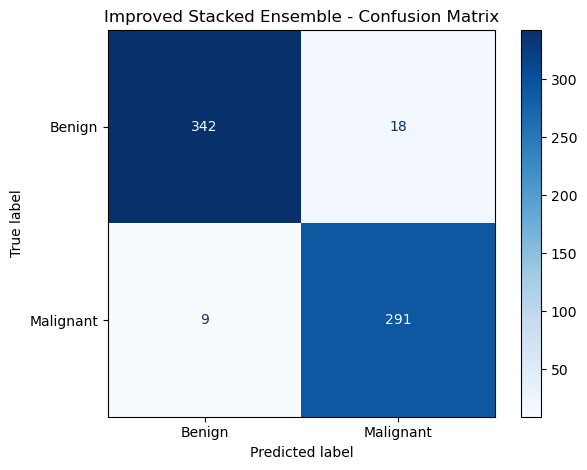

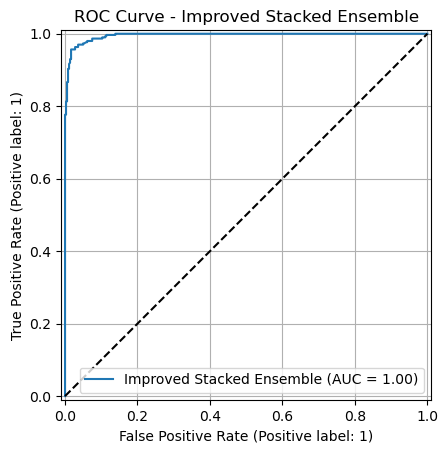

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

#Generate model outputs
svm_probs = svm_model.predict_proba(X_test_selected)[:, 1]
rf_probs = rf_model.predict_proba(X_test_selected)[:, 1]
cnn_probs = model.predict(X_test_e)[:, 1]

#Stack probabilities into new feature space
X_meta = np.vstack((svm_probs, rf_probs, cnn_probs)).T  # Shape: (num_samples, 3)

#Train Gradient Boosting as meta-classifier
meta_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
meta_model.fit(X_meta, y_test)

#Final prediction using meta-model
ensemble_preds = meta_model.predict(X_meta)
ensemble_probs = meta_model.predict_proba(X_meta)[:, 1]

#Evaluation 
acc = accuracy_score(y_test, ensemble_preds)
auc_score = roc_auc_score(y_test, ensemble_probs)

print(f"\n Improved Stacked Ensemble Accuracy: {acc * 100:.2f}%")
print(f" Improved AUC Score: {auc_score:.4f}")
print("Classification Report:")
print(classification_report(y_test, ensemble_preds, target_names=["Benign", "Malignant"]))

#Confusion Matrix 
cm = confusion_matrix(y_test, ensemble_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Improved Stacked Ensemble - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

#ROC Curve
RocCurveDisplay.from_predictions(y_test, ensemble_probs, name="Improved Stacked Ensemble")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Improved Stacked Ensemble")
plt.grid(True)
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step


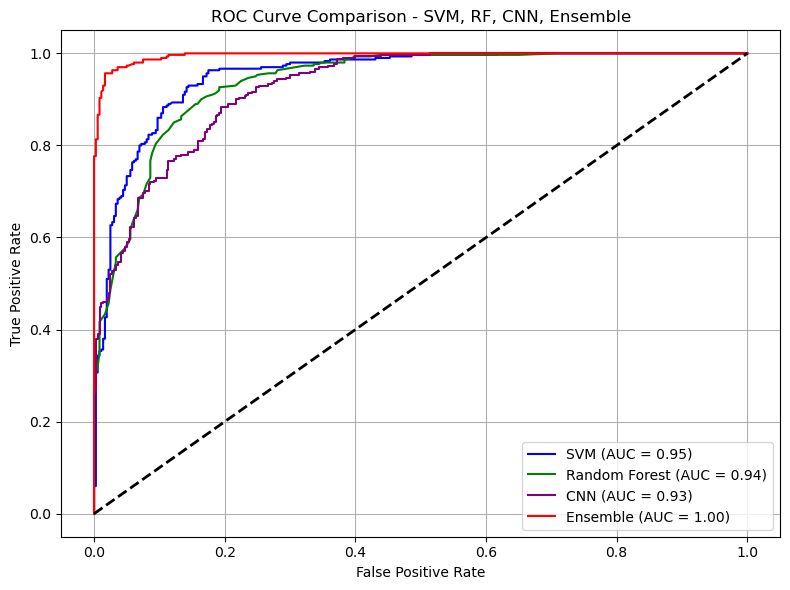

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_selected)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_selected)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#  CNN 
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, model.predict(X_test_e)[:, 1])
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

#  Ensemble 
fpr_ens, tpr_ens, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ens = auc(fpr_ens, tpr_ens)

# ROC Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN (AUC = {roc_auc_cnn:.2f})", color='purple')
plt.plot(fpr_ens, tpr_ens, label=f"Ensemble (AUC = {roc_auc_ens:.2f})", color='red')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - SVM, RF, CNN, Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


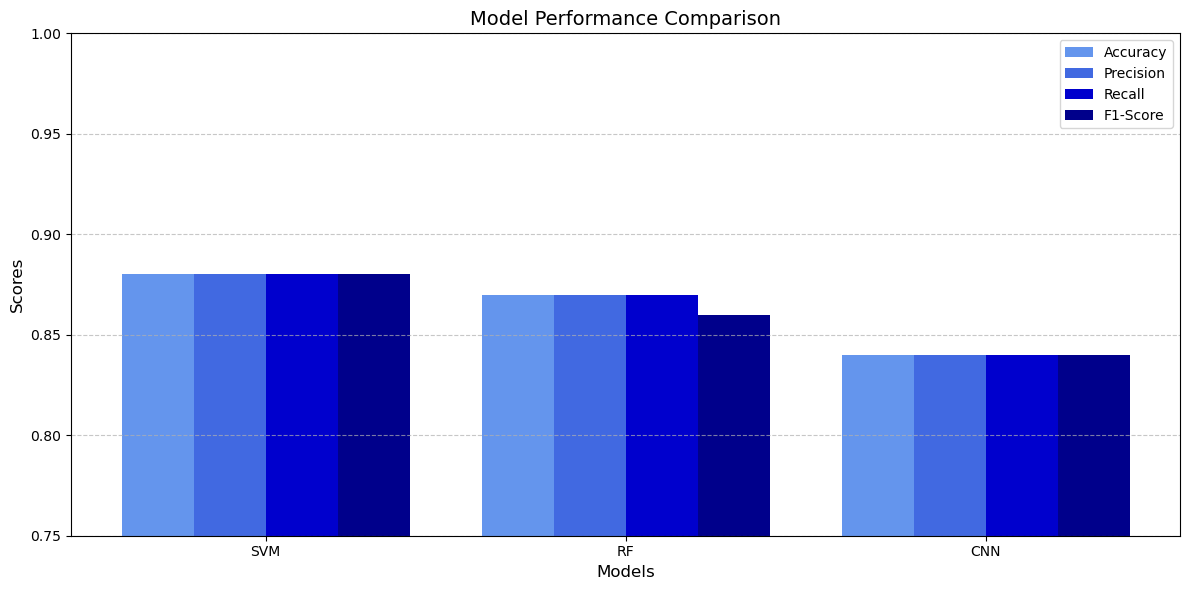

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for each model
accuracies =   [0.88, 0.87, 0.84]
precisions =   [0.88, 0.87, 0.84]
recalls =      [0.88, 0.87, 0.84]
f1_scores =    [0.88, 0.86, 0.84]

# Model names
models = ['SVM', 'RF', 'CNN']
x = np.arange(len(models))
bar_width = 0.2

# Plotting bars
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * bar_width, accuracies, width=bar_width, color='cornflowerblue', label='Accuracy')
plt.bar(x - 0.5 * bar_width, precisions, width=bar_width, color='royalblue', label='Precision')
plt.bar(x + 0.5 * bar_width, recalls, width=bar_width, color='mediumblue', label='Recall')
plt.bar(x + 1.5 * bar_width, f1_scores, width=bar_width, color='darkblue', label='F1-Score')

# Labels
plt.xlabel("Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)
plt.xticks(x, models)
plt.ylim([0.75, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


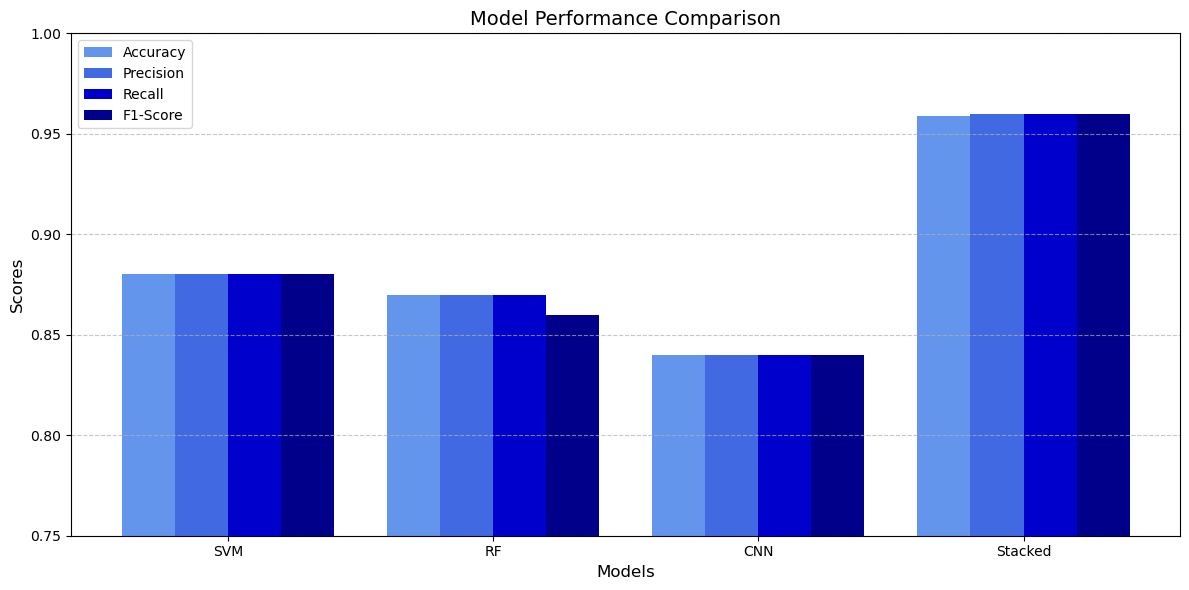

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for each model
accuracies =   [0.88, 0.87, 0.84, 0.9591]
precisions =   [0.88, 0.87, 0.84, 0.96]
recalls =      [0.88, 0.87, 0.84, 0.96]
f1_scores =    [0.88, 0.86, 0.84, 0.96]

# Model names
models = ['SVM', 'RF', 'CNN', 'Stacked']
x = np.arange(len(models))
bar_width = 0.2

# Plotting bars
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * bar_width, accuracies, width=bar_width, color='cornflowerblue', label='Accuracy')
plt.bar(x - 0.5 * bar_width, precisions, width=bar_width, color='royalblue', label='Precision')
plt.bar(x + 0.5 * bar_width, recalls, width=bar_width, color='mediumblue', label='Recall')
plt.bar(x + 1.5 * bar_width, f1_scores, width=bar_width, color='darkblue', label='F1-Score')

# Labels
plt.xlabel("Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)
plt.xticks(x, models)
plt.ylim([0.75, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


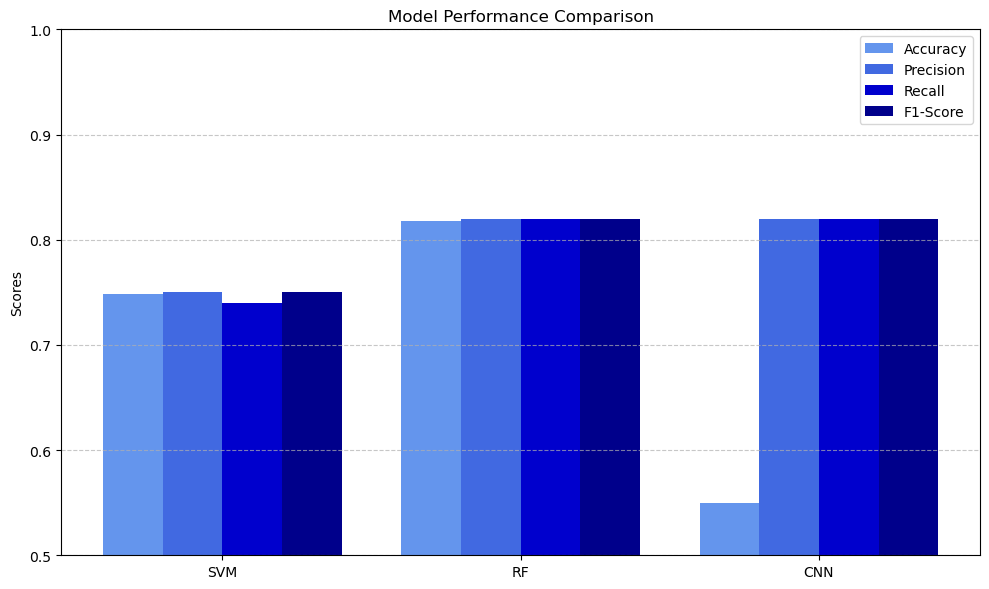

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVM', 'RF', 'CNN']

accuracy = [74.85, 81.82, 55.00]
f1_score = [0.75, 0.82, 0.82]
precision = [0.75, 0.82, 0.82]
recall = [0.74, 0.82, 0.82]

# Convert accuracy to decimal for consistency
accuracy = [a / 100 for a in accuracy]

# Grouped bar chart
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='cornflowerblue')
plt.bar(x - 0.5 * width, precision, width, label='Precision', color='royalblue')
plt.bar(x + 0.5 * width, recall, width, label='Recall', color='mediumblue')
plt.bar(x + 1.5 * width, f1_score, width, label='F1-Score', color='darkblue')

# Labels and formatting
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
